<a href="https://colab.research.google.com/github/Husayn01/Machine-Learning-Projects/blob/main/Excellent_Store_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv("https://raw.githubusercontent.com/Husayn01/Machine-Learning-Projects/refs/heads/main/Excellent%20Store%20Challenge/data/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/Husayn01/Machine-Learning-Projects/refs/heads/main/Excellent%20Store%20Challenge/data/test.csv")
sub_sample_df = pd.read_csv("https://raw.githubusercontent.com/Husayn01/Machine-Learning-Projects/refs/heads/main/Excellent%20Store%20Challenge/data/SampleSubmission.csv")

In [ ]:
min_value = train_df['Item_Store_Returns'].min()
max_value = train_df['Item_Store_Returns'].max()
value_range = max_value - min_value

print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"Range: {value_range}")

Minimum: 83.23
Maximum: 32717.41
Range: 32634.18


In [ ]:
train_df.head(10)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.60,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.60,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.60,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.60,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.60,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
5,DRA12,BABATUNJI045,DRA12_BABATUNJI045,11.60,Low Sugar,0.000000,Soft Drinks,354.04,2009,NaN,Cluster 2,Supermarket Type1,9572.54
6,DRA24,BABATUNJI010,DRA24_BABATUNJI010,19.35,Normal Sugar,0.066832,Soft Drinks,409.72,2005,NaN,Cluster 3,Grocery Store,818.93
7,DRA24,BABATUNJI013,DRA24_BABATUNJI013,19.35,Normal Sugar,0.039895,Soft Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61
8,DRA24,BABATUNJI017,DRA24_BABATUNJI017,19.35,Normal Sugar,0.040154,Soft Drinks,411.72,2014,NaN,Cluster 2,Supermarket Type1,2866.27
9,DRA24,BABATUNJI019,DRA24_BABATUNJI019,NaN,Normal Sugar,0.069909,Soft Drinks,408.22,1992,Small,Cluster 1,Grocery Store,1228.40


In [ ]:
test_df.head(2)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.27,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.27,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1


In [ ]:
sub_sample_df.head(2)

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,100
1,DRA59_BABATUNJI013,100


In [ ]:
train_df.shape

(4990, 13)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [ ]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [ ]:
train_df.isna().sum()

,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,802
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,1450


In [ ]:
percentage_missing = train_df.isna().sum() / len(train_df) * 100
print(percentage_missing)

Item_ID                 0.000000
Store_ID                0.000000
Item_Store_ID           0.000000
Item_Weight            16.072144
Item_Sugar_Content      0.000000
Item_Visibility         0.000000
Item_Type               0.000000
Item_Price              0.000000
Store_Start_Year        0.000000
Store_Size             29.058116
Store_Location_Type     0.000000
Store_Type              0.000000
Item_Store_Returns      0.000000
dtype: float64


In [ ]:
# sample_data = train_df.sample(10)
# from google.colab import files
# sample_data.to_csv('sample_data.csv', index=False)
# files.download('sample_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ===== STEP 1: LOAD AND EXPLORE DATA =====

In [ ]:
def load_and_explore_data(file_path):
    """Load data and perform initial exploration"""
    print("🔍 Loading and exploring data...")

    df = pd.read_csv(file_path)

    print(f"Dataset shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nMissing values:")
    print(df.isnull().sum())
    print(f"\nBasic statistics for target variable:")
    print(df['Item_Store_Returns'].describe())

    return df

In [ ]:
load_and_explore_data("https://raw.githubusercontent.com/Husayn01/Machine-Learning-Projects/refs/heads/main/Excellent%20Store%20Challenge/data/train.csv")

🔍 Loading and exploring data...
Dataset shape: (4990, 13)

Columns: ['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight', 'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price', 'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type', 'Item_Store_Returns']

Missing values:
Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

Basic statistics for target variable:
count     4990.000000
mean      6103.520164
std       4447.333835
min         83.230000
25%       2757.660000
50%       5374.675000
75%       8522.240000
max      32717.410000
Name: Item_Store_Returns, dtype: float64


,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.60,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.60,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.60,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.60,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.60,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,NCZ54,BABATUNJI019,NCZ54_BABATUNJI019,NaN,Low Sugar,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14
4986,NCZ54,BABATUNJI027,NCZ54_BABATUNJI027,NaN,Low Sugar,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69
4987,NCZ54,BABATUNJI045,NCZ54_BABATUNJI045,14.65,Low Sugar,0.083528,Household,406.14,2009,NaN,Cluster 2,Supermarket Type1,5685.93
4988,NCZ54,BABATUNJI046,NCZ54_BABATUNJI046,14.65,Low Sugar,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00


# ===== STEP 2: DATA VISUALIZATION =====

In [ ]:
def create_visualizations(df):
    """Create visualizations for data understanding"""
    print("📊 Creating visualizations...")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Target variable distribution
    axes[0,0].hist(df['Item_Store_Returns'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0,0].set_title('Distribution of Item Store Returns', fontsize=12, fontweight='bold')
    axes[0,0].set_xlabel('Returns')
    axes[0,0].set_ylabel('Frequency')

    # Returns by Item Type
    item_returns = df.groupby('Item_Type')['Item_Store_Returns'].mean().sort_values(ascending=False)
    bars1 = axes[0,1].bar(range(len(item_returns)), item_returns.values, color='lightcoral')
    axes[0,1].set_title('Average Returns by Item Type', fontsize=12, fontweight='bold')
    axes[0,1].set_xticks(range(len(item_returns)))
    axes[0,1].set_xticklabels(item_returns.index, rotation=45, ha='right')
    axes[0,1].set_ylabel('Average Returns')

    # Returns by Store Type
    store_returns = df.groupby('Store_Type')['Item_Store_Returns'].mean()
    bars2 = axes[0,2].bar(store_returns.index, store_returns.values, color='lightgreen')
    axes[0,2].set_title('Average Returns by Store Type', fontsize=12, fontweight='bold')
    axes[0,2].set_ylabel('Average Returns')

    # Price vs Returns scatter
    axes[1,0].scatter(df['Item_Price'], df['Item_Store_Returns'], alpha=0.7, color='purple')
    axes[1,0].set_xlabel('Item Price')
    axes[1,0].set_ylabel('Returns')
    axes[1,0].set_title('Price vs Returns', fontsize=12, fontweight='bold')

    # Visibility vs Returns
    axes[1,1].scatter(df['Item_Visibility'], df['Item_Store_Returns'], alpha=0.7, color='orange')
    axes[1,1].set_xlabel('Item Visibility')
    axes[1,1].set_ylabel('Returns')
    axes[1,1].set_title('Visibility vs Returns', fontsize=12, fontweight='bold')

    # Store Age vs Returns (if Store_Start_Year exists)
    if 'Store_Start_Year' in df.columns:
        store_age = 2025 - df['Store_Start_Year']
        axes[1,2].scatter(store_age, df['Item_Store_Returns'], alpha=0.7, color='brown')
        axes[1,2].set_xlabel('Store Age (years)')
        axes[1,2].set_ylabel('Returns')
        axes[1,2].set_title('Store Age vs Returns', fontsize=12, fontweight='bold')
    else:
        axes[1,2].text(0.5, 0.5, 'Store Age data\nnot available', ha='center', va='center', transform=axes[1,2].transAxes)

    plt.tight_layout()
    plt.show()

📊 Creating visualizations...


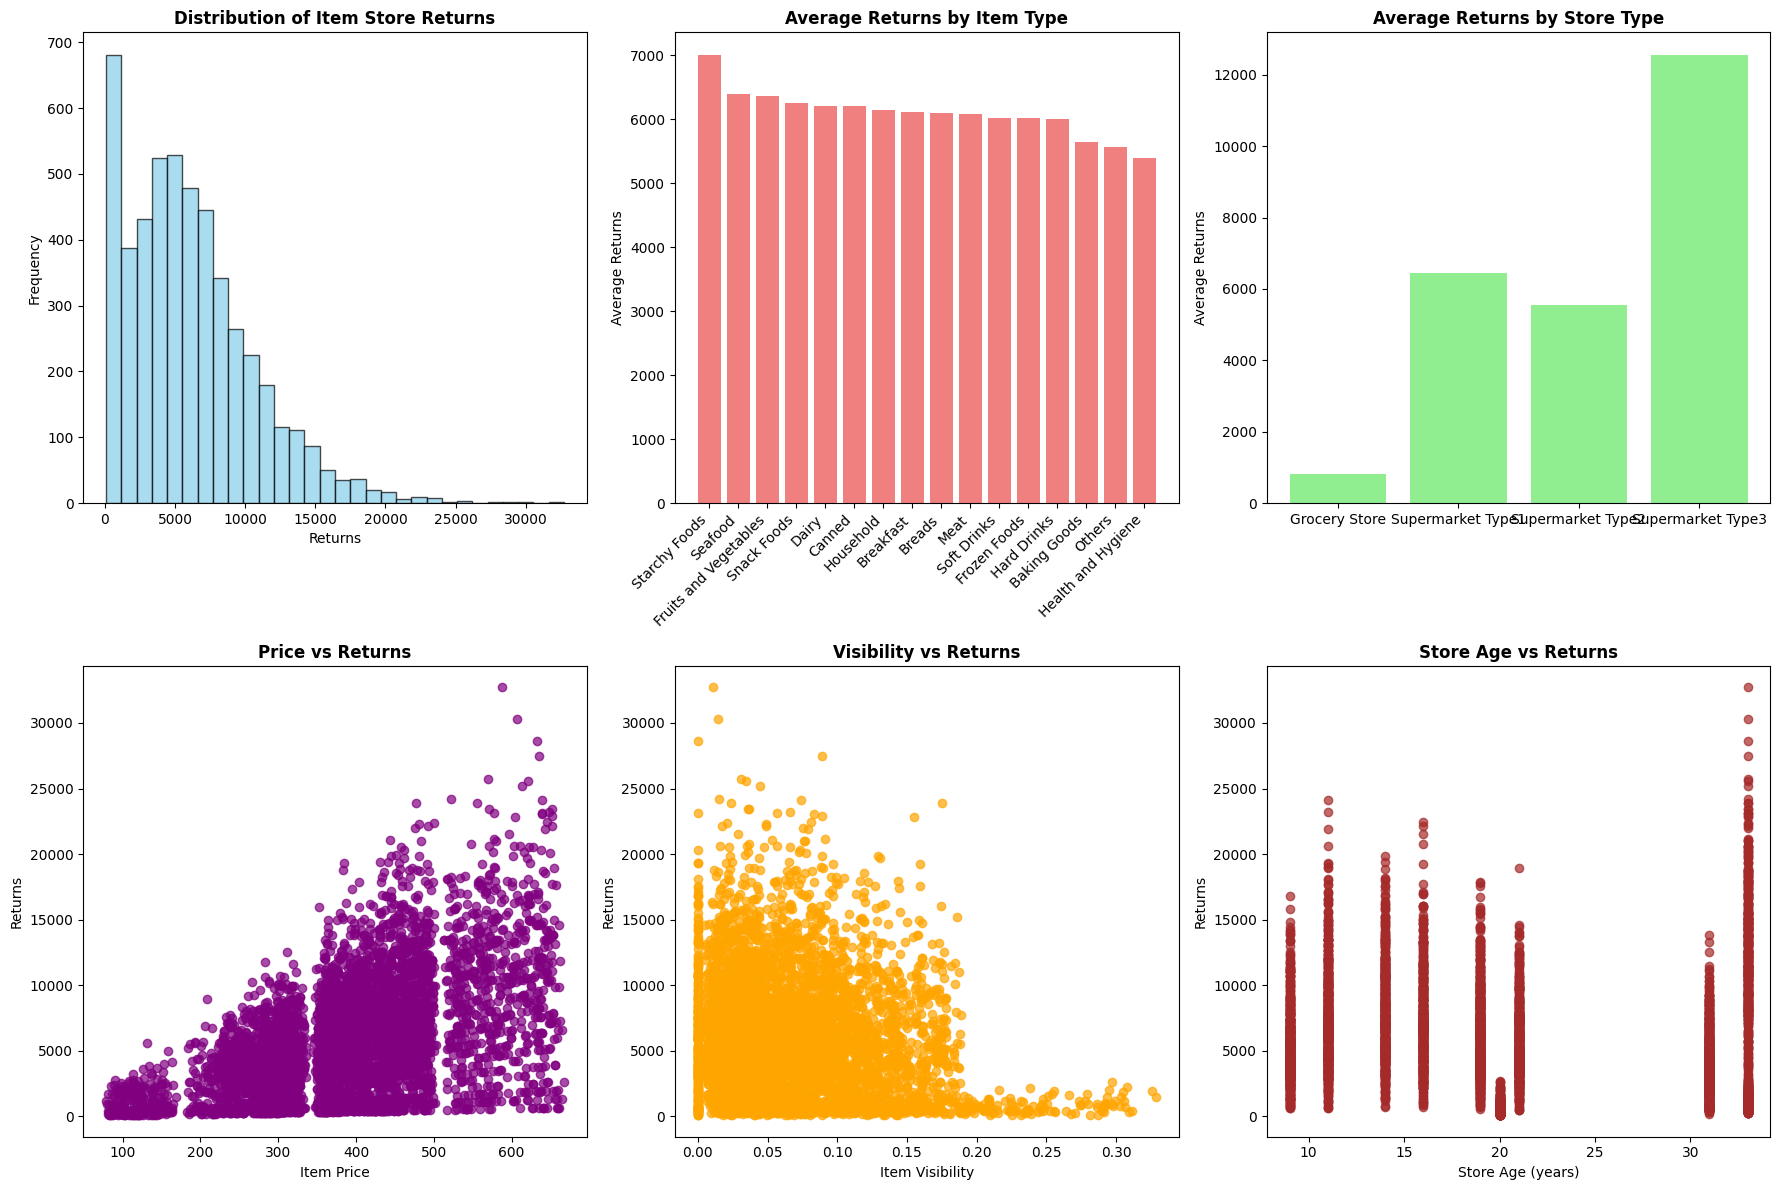

In [ ]:
create_visualizations(train_df)

# ===== STEP 3: DATA PREPROCESSING =====

In [ ]:
def clean_data(df):
    """Clean and handle missing values"""
    print("🛠️ Cleaning data...")

    df_clean = df.copy()

    # Handle missing Item_Weight
    if df_clean['Item_Weight'].isnull().any():
        median_weight = df_clean['Item_Weight'].median()
        missing_count = df_clean['Item_Weight'].isnull().sum()
        df_clean['Item_Weight'].fillna(median_weight, inplace=True)
        print(f"Filled {missing_count} missing weights with median: {median_weight:.2f}")

    # Handle missing Store_Size
    if 'Store_Size' in df_clean.columns and df_clean['Store_Size'].isnull().any():
        missing_count = df_clean['Store_Size'].isnull().sum()
        df_clean['Store_Size'].fillna('Unknown', inplace=True)
        print(f"Filled {missing_count} missing Store_Size values with 'Unknown'")

    return df_clean

In [ ]:
df_clean = clean_data(train_df)

🛠️ Cleaning data...
Filled 802 missing weights with median: 12.60
Filled 1450 missing Store_Size values with 'Unknown'


In [ ]:
df_clean.isna().sum()

,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,0
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,0


In [ ]:
def create_features(df):
    """Create new features from existing data"""
    print("🔧 Engineering features...")

    df_features = df.copy()

    # Create Store Age
    if 'Store_Start_Year' in df_features.columns:
        df_features['Store_Age'] = 2025 - df_features['Store_Start_Year']
        print("Created Store_Age feature")

    # Create Price per Weight ratio
    df_features['Price_per_Weight'] = df_features['Item_Price'] / (df_features['Item_Weight'] + 0.1)
    print("Created Price_per_Weight feature")

    # Create Visibility Categories
    df_features['Visibility_Category'] = pd.cut(df_features['Item_Visibility'],
                                               bins=3, labels=['Low', 'Medium', 'High'])
    print("Created Visibility_Category feature")

    return df_features

In [ ]:
df_clean = create_features(df_clean)

🔧 Engineering features...
Created Store_Age feature
Created Price_per_Weight feature
Created Visibility_Category feature


In [ ]:
df_clean.head(2)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Store_Age,Price_per_Weight,Visibility_Category
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Unknown,Cluster 3,Grocery Store,709.08,20,30.558974,Low
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,31,30.409402,Low


In [ ]:
def encode_categorical_features(df):
    """Encode categorical variables to numerical format"""
    print("📝 Encoding categorical features...")

    df_encoded = df.copy()
    encoders = {}

    # List of categorical columns to encode
    categorical_columns = ['Item_Sugar_Content', 'Item_Type', 'Store_Size',
                          'Store_Location_Type', 'Store_Type', 'Visibility_Category']

    for col in categorical_columns:
        if col in df_encoded.columns:
            le = LabelEncoder()
            df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col].astype(str))
            encoders[col] = le
            print(f"Encoded {col}: {len(le.classes_)} unique values")

    return df_encoded, encoders

In [ ]:
df_clean, encoders = encode_categorical_features(df_clean)

📝 Encoding categorical features...
Encoded Item_Sugar_Content: 3 unique values
Encoded Item_Type: 16 unique values
Encoded Store_Size: 4 unique values
Encoded Store_Location_Type: 3 unique values
Encoded Store_Type: 4 unique values
Encoded Visibility_Category: 3 unique values


In [ ]:
df_clean.head(2)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,...,Item_Store_Returns,Store_Age,Price_per_Weight,Visibility_Category,Item_Sugar_Content_encoded,Item_Type_encoded,Store_Size_encoded,Store_Location_Type_encoded,Store_Type_encoded,Visibility_Category_encoded
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Unknown,...,709.08,20,30.558974,Low,0,14,3,2,0,1
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,...,6381.69,31,30.409402,Low,0,14,0,2,1,1


In [ ]:
# ===== STEP 4: PREPARE FEATURES =====
def prepare_feature_matrix(df):
    """Prepare the final feature matrix for modeling"""
    print("📋 Preparing feature matrix...")

    # Define base features
    feature_columns = ['Item_Weight', 'Item_Visibility', 'Item_Price', 'Price_per_Weight']

    # Add encoded categorical features
    encoded_features = [col for col in df.columns if col.endswith('_encoded')]
    feature_columns.extend(encoded_features)

    # Add Store_Age if available
    if 'Store_Age' in df.columns:
        feature_columns.append('Store_Age')

    # Keep only features that exist in the dataframe
    available_features = [col for col in feature_columns if col in df.columns]

    print(f"Selected features: {available_features}")

    # Create feature matrix and target
    X = df[available_features]
    y = df['Item_Store_Returns']

    print(f"Feature matrix shape: {X.shape}")
    print(f"Target variable shape: {y.shape}")

    return X, y, available_features

In [ ]:
X, y, available_features = prepare_feature_matrix(df_clean)

📋 Preparing feature matrix...
Selected features: ['Item_Weight', 'Item_Visibility', 'Item_Price', 'Price_per_Weight', 'Item_Sugar_Content_encoded', 'Item_Type_encoded', 'Store_Size_encoded', 'Store_Location_Type_encoded', 'Store_Type_encoded', 'Visibility_Category_encoded', 'Store_Age']
Feature matrix shape: (4990, 11)
Target variable shape: (4990,)


In [ ]:
X.head(2)

,Item_Weight,Item_Visibility,Item_Price,Price_per_Weight,Item_Sugar_Content_encoded,Item_Type_encoded,Store_Size_encoded,Store_Location_Type_encoded,Store_Type_encoded,Visibility_Category_encoded,Store_Age
0,11.6,0.068535,357.54,30.558974,0,14,3,2,0,1,20
1,11.6,0.040912,355.79,30.409402,0,14,0,2,1,1,31


In [ ]:
y.head(2)

,Item_Store_Returns
0,709.08
1,6381.69


In [ ]:
def train_and_evaluate_models(X, y):
    """Train multiple models and compare their performance"""
    print("🤖 Training and evaluating models...")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models to try
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        test_r2 = r2_score(y_test, y_pred_test)

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5,
                                   scoring='neg_mean_squared_error', n_jobs=-1)
        cv_rmse = np.sqrt(-cv_scores.mean())

        results[name] = {
            'model': model,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'test_r2': test_r2,
            'cv_rmse': cv_rmse,
            'predictions': y_pred_test
        }

        print(f"  Training RMSE: {train_rmse:.2f}")
        print(f"  Test RMSE: {test_rmse:.2f}")
        print(f"  Test R²: {test_r2:.3f}")
        print(f"  Cross-validation RMSE: {cv_rmse:.2f}")

    # Find best model
    best_model_name = min(results.keys(), key=lambda x: results[x]['cv_rmse'])
    best_model = results[best_model_name]['model']

    print(f"\n🏆 Best model: {best_model_name}")

    return results, best_model, best_model_name, X_train, X_test, y_train, y_test

In [ ]:
results, best_model, best_model_name, X_train, X_test, y_train, y_test = train_and_evaluate_models(X, y)

🤖 Training and evaluating models...

Training Linear Regression...
  Training RMSE: 3193.00
  Test RMSE: 3226.38
  Test R²: 0.459
  Cross-validation RMSE: 3204.89

Training Random Forest...
  Training RMSE: 1156.08
  Test RMSE: 3104.67
  Test R²: 0.499
  Cross-validation RMSE: 3099.44

🏆 Best model: Random Forest


In [ ]:
def tune_hyperparameters(best_model_name, X_train, y_train, X_test, y_test):
    """Perform hyperparameter tuning on the best model"""
    print("⚡ Performing hyperparameter tuning...")

    if best_model_name == 'Random Forest':
        # Define parameter grid
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

        # Perform grid search
        grid_search = GridSearchCV(
            RandomForestRegressor(random_state=42, n_jobs=-1),
            param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        tuned_model = grid_search.best_estimator_

        # Evaluate tuned model
        y_pred_tuned = tuned_model.predict(X_test)
        tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
        tuned_r2 = r2_score(y_test, y_pred_tuned)

        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Tuned model RMSE: {tuned_rmse:.2f}")
        print(f"Tuned model R²: {tuned_r2:.3f}")

        return tuned_model, tuned_rmse
    else:
        print("Hyperparameter tuning not implemented for this model type.")
        return None, None


In [ ]:
tuned_model, tuned_rmse = tune_hyperparameters(best_model_name, X_train, y_train, X_test, y_test)

⚡ Performing hyperparameter tuning...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Tuned model RMSE: 3000.68
Tuned model R²: 0.532


In [ ]:
def analyze_feature_importance(model, feature_names):
    """Analyze and visualize feature importance"""
    print("📈 Analyzing feature importance...")

    if hasattr(model, 'feature_importances_'):
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

        # Create visualization
        plt.figure(figsize=(12, 8))
        sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
        plt.title('Feature Importance Analysis', fontsize=16, fontweight='bold')
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Features', fontsize=12)
        plt.tight_layout()
        plt.show()

        print("Top 5 Most Important Features:")
        print(importance_df.head())

        return importance_df
    else:
        print("Feature importance not available for this model type.")
        return None

📈 Analyzing feature importance...


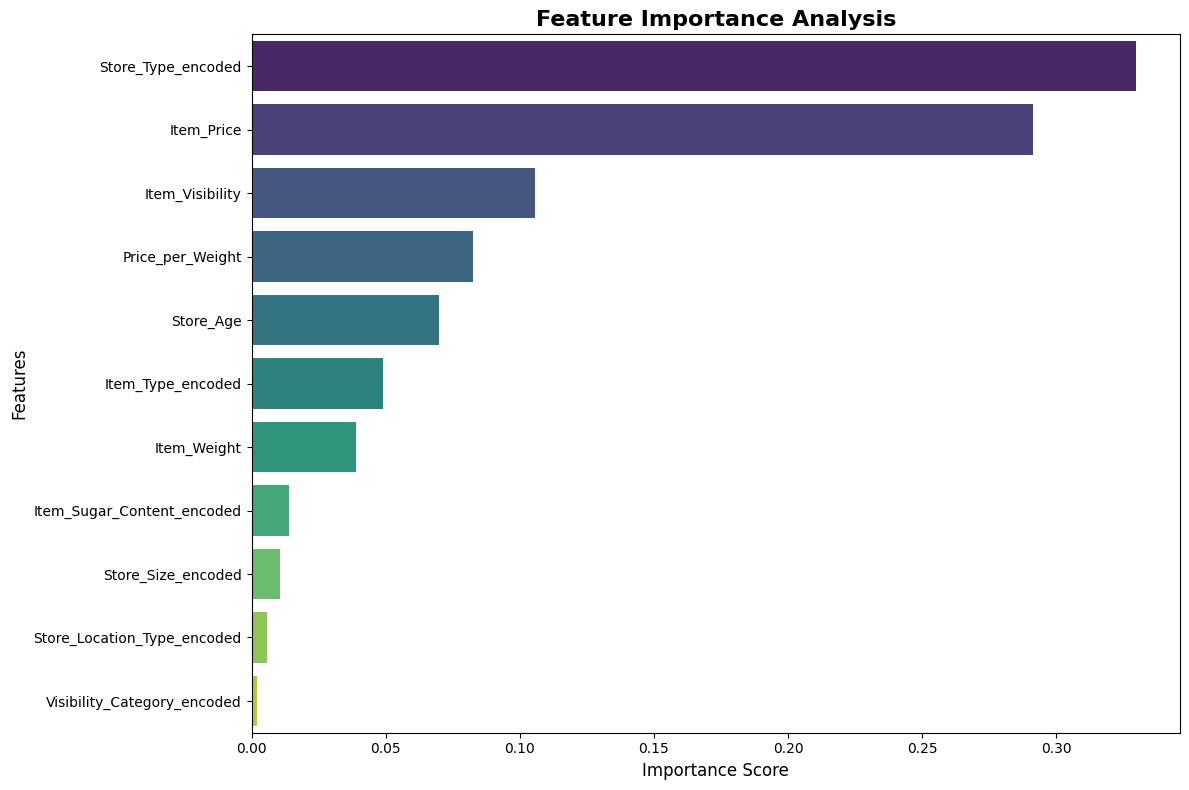

Top 5 Most Important Features:
               feature  importance
8   Store_Type_encoded    0.329666
2           Item_Price    0.291214
1      Item_Visibility    0.105745
3     Price_per_Weight    0.082639
10           Store_Age    0.069910


In [ ]:
    # Step 8: Feature importance analysis
    importance_df = analyze_feature_importance(best_model, available_features)

In [ ]:
def visualize_model_performance(results, y_test, best_model_name):
    """Create visualizations for model performance"""
    print("📊 Creating performance visualizations...")

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Model comparison
    model_names = list(results.keys())
    rmse_scores = [results[name]['test_rmse'] for name in model_names]
    r2_scores = [results[name]['test_r2'] for name in model_names]

    # RMSE comparison
    bars1 = axes[0].bar(model_names, rmse_scores, color=['skyblue', 'lightcoral'])
    axes[0].set_title('Model RMSE Comparison', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('RMSE')
    axes[0].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, v in enumerate(rmse_scores):
        axes[0].text(i, v + max(rmse_scores)*0.01, f'{v:.1f}', ha='center', va='bottom')

    # R² comparison
    bars2 = axes[1].bar(model_names, r2_scores, color=['lightgreen', 'orange'])
    axes[1].set_title('Model R² Comparison', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('R² Score')
    axes[1].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, v in enumerate(r2_scores):
        axes[1].text(i, v + max(r2_scores)*0.01, f'{v:.3f}', ha='center', va='bottom')

    # Actual vs Predicted for best model
    best_predictions = results[best_model_name]['predictions']
    axes[2].scatter(y_test, best_predictions, alpha=0.7, color='purple')
    axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[2].set_xlabel('Actual Returns')
    axes[2].set_ylabel('Predicted Returns')
    axes[2].set_title(f'Actual vs Predicted ({best_model_name})', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

📊 Creating performance visualizations...


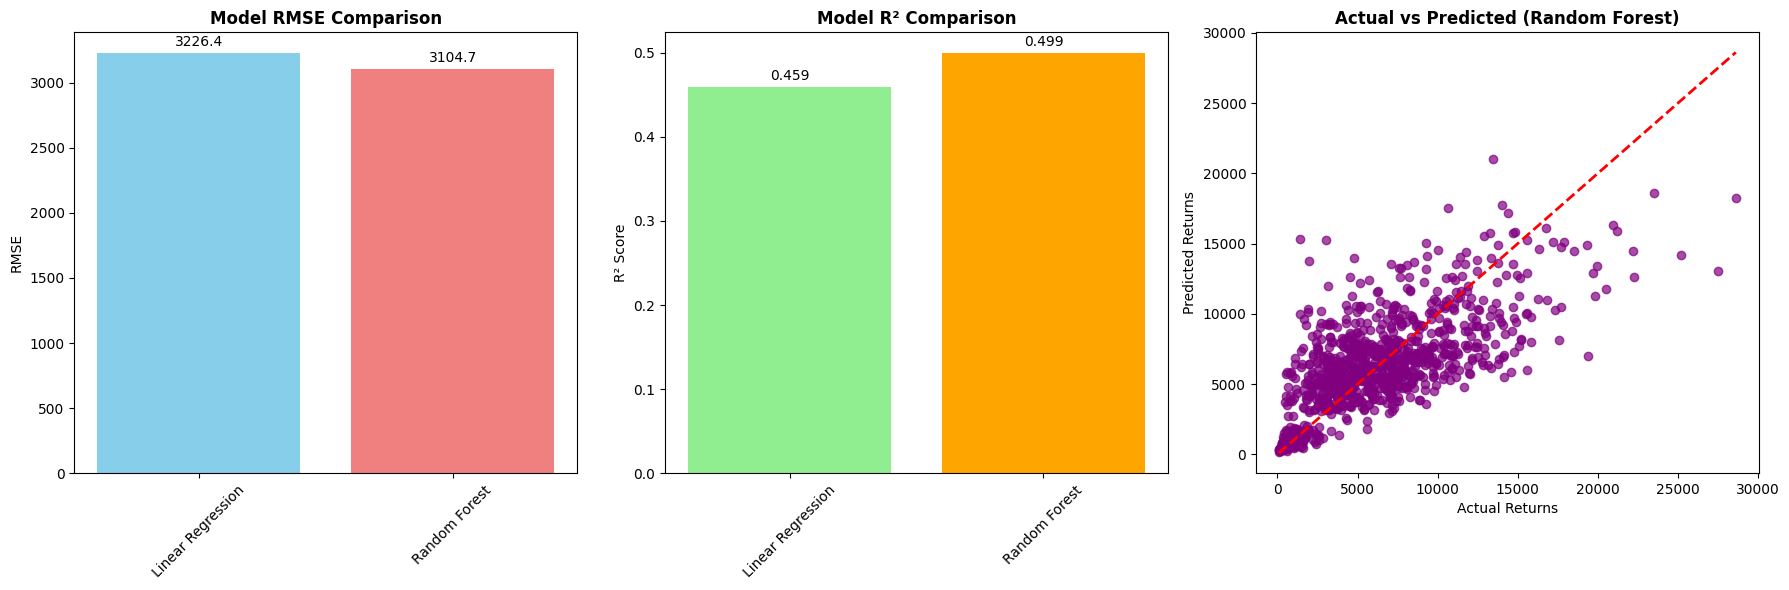

In [ ]:
visualize_model_performance(results, y_test, best_model_name)

In [ ]:
# Step 1: Clean the test data
test_clean = clean_data(test_df)

# Step 2: Create features
test_clean = create_features(test_clean)

# Step 3: Encode categorical features (use previously fitted encoders)
def apply_encoders(df, encoders):
    """Apply saved label encoders to the test dataset"""
    print("🧪 Applying encoders to test data...")
    df_encoded = df.copy()

    for col, le in encoders.items():
        if col in df_encoded.columns:
            df_encoded[col + '_encoded'] = le.transform(df_encoded[col].astype(str))

    return df_encoded

test_clean = apply_encoders(test_clean, encoders)

# Step 4: Prepare feature matrix for test set
def prepare_test_features(df, feature_names):
    """Prepare features from test set using selected columns"""
    print("🗂️ Preparing test feature matrix...")
    return df[feature_names]

X_test_final = prepare_test_features(test_clean, available_features)

# Step 5: Make predictions using the tuned model
print("📤 Making predictions on test data...")
test_predictions = tuned_model.predict(X_test_final)

# Step 6: Create submission file
submission_df = test_df[['Item_ID', 'Store_ID']].copy()
submission_df['Item_Store_Returns'] = test_predictions

# Step 7: Download the result (if in Colab)
submission_df.to_csv('store_returns_predictions.csv', index=False)

# If in Colab:
# from google.colab import files
# files.download('store_returns_predictions.csv')

# Preview the final submission
submission_df.head()


🛠️ Cleaning data...
Filled 661 missing weights with median: 12.60
Filled 959 missing Store_Size values with 'Unknown'
🔧 Engineering features...
Created Store_Age feature
Created Price_per_Weight feature
Created Visibility_Category feature
🧪 Applying encoders to test data...
🗂️ Preparing test feature matrix...
📤 Making predictions on test data...


,Item_ID,Store_ID,Item_Store_Returns
0,DRA59,BABATUNJI010,1191.096740
1,DRA59,BABATUNJI013,8045.527586
2,DRB01,BABATUNJI013,8221.092145
3,DRB13,BABATUNJI010,1132.383887
4,DRB13,BABATUNJI013,7537.911077


In [ ]:
# Create the Item_Store_ID column
submission_df = test_df.copy()
submission_df['Item_Store_ID'] = submission_df['Item_ID'] + "_" + submission_df['Store_ID']
submission_df['Item_Store_Returns'] = test_predictions

# Select only required columns
final_submission = submission_df[['Item_Store_ID', 'Item_Store_Returns']]

# Save to CSV
final_submission.to_csv("store_returns_submission.csv", index=False)

# If you're in Colab and want to download it
# from google.colab import files
# files.download("store_returns_submission.csv")

# Preview the file
final_submission.head()

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1191.096740
1,DRA59_BABATUNJI013,8045.527586
2,DRB01_BABATUNJI013,8221.092145
3,DRB13_BABATUNJI010,1132.383887
4,DRB13_BABATUNJI013,7537.911077


In [ ]:
from google.colab import files
files.download('store_returns_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>